This notebook is dedicated to investigating how various predictors—such as weather, road conditions, and time of day—affect the number of car accidents. In other words, it contains regression analysis on count data, followed by policy recommendations. The data, originally from the British government's site https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data, was sourced from Kaggle at https://www.kaggle.com/datasets/bluehorseshoe/uk-2016-road-safety-data. The data covers the year 2016.

# 1. Loading the libraries and importing the data

In [2]:
import ISLP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.model_selection import train_test_split


In [3]:
Main = pd.read_csv("dftRoadSafety_Accidents_2016.csv",dtype={'LSOA_of_Accident_Location': str})

In [4]:
Main.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2016010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,1,01/11/2016,...,0,0,5,1,1,0,0,1,1,E01000543
1,2016010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01000375
2,2016010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,1,01/11/2016,...,0,0,4,1,1,0,0,1,1,E01033725
3,2016010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01003379
4,2016010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01002583
5,2016010000019,530840.0,167100.0,-0.121004,51.387813,1,3,2,1,01/11/2016,...,0,8,1,1,1,0,0,1,1,E01001180
6,2016010000020,527610.0,181430.0,-0.162234,51.517333,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01004658
7,2016010000021,523830.0,189460.0,-0.213859,51.590341,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01000243
8,2016010000023,524640.0,180620.0,-0.205302,51.510716,1,3,1,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01002875
9,2016010000024,540670.0,174700.0,0.023193,51.453758,1,3,2,1,01/11/2016,...,0,0,1,1,1,0,0,1,1,E01001658


In [5]:
Main.shape

(136621, 32)

In [6]:
# Printing all column names:

print(Main.columns)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


In [7]:
# Checking for missing values:

missing_values = Main.isnull().sum()
missing_values

,0
Accident_Index,0
Location_Easting_OSGR,7
Location_Northing_OSGR,7
Longitude,7
Latitude,7
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


From the above list, I will only be using the Time column which has two missing values. Removing 2 rows out of 136621 is inconsequental.

In [8]:
Main.dropna(inplace=True)

Besides the null values, there are also numerical values corresponding to missing or undefined data:

**Weather:**

8 Other

9 unknown

-1 Data missing or out of range

**Urban or Rural Area:**

3 Unallocated

**Road Type:**

9 Unknown

-1 Data missing or out of range



# 2. Data wrangling

The dataframe is quite massive, both in terms of rows and columns. I will keep only a subset of predictors:

1. Weather_Conditions,

2. Urban_or_Rural_Area

3. Road_Type

4. Day_of_Week

5. Date (from which I will extract the month)

6. Time (from which I will extract the hour)

In [9]:
Main1 = Main[['Date', 'Day_of_Week', 'Time','Weather_Conditions','Urban_or_Rural_Area','Road_Type']].copy()


In [10]:
Main1.head()

,Date,Day_of_Week,Time,Weather_Conditions,Urban_or_Rural_Area,Road_Type
0,01/11/2016,3,02:30,1,1,6
1,01/11/2016,3,00:37,1,1,6
2,01/11/2016,3,01:25,1,1,1
3,01/11/2016,3,09:15,1,1,6
4,01/11/2016,3,07:53,1,1,3


In [11]:
Main1.dtypes

,0
Date,object
Day_of_Week,int64
Time,object
Weather_Conditions,int64
Urban_or_Rural_Area,int64
Road_Type,int64


I change Date and Time columns to a datetime object and subsequently create new columns: Month and Hour, by extracting the relevant pieces from Date and Time:

In [12]:
Main1['Date']=pd.to_datetime(Main1['Date'],format='mixed')
Main1['Time']=pd.to_datetime(Main1['Time'],format='mixed')
Main1["Month"]=Main1['Date'].dt.month
Main1["Hour"]=Main1["Time"].dt.hour

In [13]:
# Dropping Date and Time:

Main1=Main1[["Month","Day_of_Week", "Hour","Weather_Conditions","Urban_or_Rural_Area","Road_Type"]]
Main1.head()

,Month,Day_of_Week,Hour,Weather_Conditions,Urban_or_Rural_Area,Road_Type
0,1,3,2,1,1,6
1,1,3,0,1,1,6
2,1,3,1,1,1,1
3,1,3,9,1,1,6
4,1,3,7,1,1,3


To apply regression, I need to count all unique rows; this will give me the number of accidents for each unique permutation of values in the rows.


In [14]:
Main_ =  Main1.groupby(["Month","Day_of_Week", "Hour","Weather_Conditions","Urban_or_Rural_Area","Road_Type"]).size().reset_index(name='Count')

In [15]:
print(Main_.shape)

(25095, 7)


In [16]:
# The last column gives a count of accidents for given conditions:

Main_.head()

,Month,Day_of_Week,Hour,Weather_Conditions,Urban_or_Rural_Area,Road_Type,Count
0,1,1,0,1,1,1,2
1,1,1,0,1,1,3,3
2,1,1,0,1,1,6,15
3,1,1,0,1,2,2,1
4,1,1,0,1,2,3,2


In addition to the null values that were removed in the previous section, there are also numerical values representing missing or undefined data, as indicated by an explanatory table provided on Kaggle:

**Weather:**

8 Other

9 unknown

-1 Data missing or out of range

**Urban or Rural Area:**

3 Unallocated

**Road Type:**

9 Unknown

-1 Data missing or out of range

In [17]:
# Counting the number of accidents where weather conditions are unknown:

Main_[(Main_["Weather_Conditions"]== -1) | (Main_["Weather_Conditions"]== 9) |(Main_["Weather_Conditions"]== 8)]["Count"].sum()

5797

In [18]:
# Counting the number of accidents where the road type is unknown:

Main_[(Main_["Road_Type"]== 9) | (Main_["Road_Type"]== -1)]["Count"].sum()

1333

In [19]:
# Counting the number of accidents where the area is unknown:

Main_[(Main_["Urban_or_Rural_Area"]==3 )]["Count"].sum()

0

In [20]:
# Checking what percentage of rows has unknown entries, assuming the above sets are disjoint:

print(f' At most, {round((1333+5797)/len(Main_)*100,3)}% of rows have undefined entries.')

 At most, 28.412% of rows have undefined entries.


Removing almost 30% of rows is a dramatic step, however, in this instance, I don't believe there is any other solution that would yield a reliable outcome.

In [21]:
Main_ = Main_.drop(Main_[(Main_["Weather_Conditions"]== -1) | (Main_["Weather_Conditions"]== 9) |(Main_["Weather_Conditions"]== 8)
| (Main_["Road_Type"]== 9) | (Main_["Road_Type"]== -1) ].index)

Providing labels for coded conditions from an explanatory table in Kaggle:

In [22]:
Main_['Weather_Conditions']=Main_['Weather_Conditions'].replace([1,2,3,4,5,6,7],['fine/NW','rain/NW','snow/NW','fine/HW','rain/HW','snow/HW','fog/mist'])
Main_['Urban_or_Rural_Area']=Main_['Urban_or_Rural_Area'].replace([1,2],['Urban','Rural'])
Main_['Road_Type']=Main_['Road_Type'].replace([1,2,3,6,7,12],['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','Slip road'])

In [23]:
Main_.head(10)

,Month,Day_of_Week,Hour,Weather_Conditions,Urban_or_Rural_Area,Road_Type,Count
0,1,1,0,fine/NW,Urban,Roundabout,2
1,1,1,0,fine/NW,Urban,Dual carriageway,3
2,1,1,0,fine/NW,Urban,Single carriageway,15
3,1,1,0,fine/NW,Rural,One way street,1
4,1,1,0,fine/NW,Rural,Dual carriageway,2
5,1,1,0,fine/NW,Rural,Single carriageway,3
6,1,1,0,rain/NW,Urban,Single carriageway,4
7,1,1,0,rain/NW,Rural,Single carriageway,2
10,1,1,1,fine/NW,Urban,Roundabout,1
11,1,1,1,fine/NW,Urban,One way street,1


Finally, all the predictors are categorical, so I cast them as such:

In [24]:
for i in Main_.columns[:-1]:
  Main_[i] = Main_[i].astype("category")
Main_['Count'] = Main_['Count'].astype(float)

In [25]:
# Saving the new dataframe:
Main_.to_csv('UKAccidents.csv', index=False)

In [26]:
UKAcc=pd.read_csv('/content/UKAccidents.csv')

# 3. Applying Poisson regression




Count data is usually modeled using Poisson regression. One of the characteristics of this distribution is that we no longer hold the variance constant, which is a typical assumption of linear regression. Let's plot the variance of the number of accidents against the mean (mean is interpolated using a spline) for the time of day:

Variance and mean with respect to months:

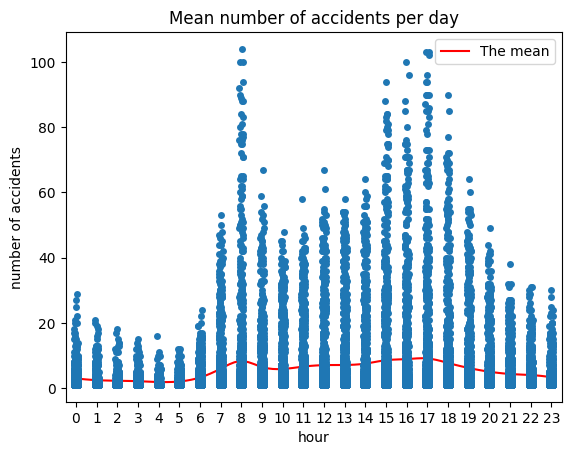

In [27]:
from scipy.interpolate import UnivariateSpline
mean_y = UKAcc.groupby('Hour')['Count'].mean()
spl = UnivariateSpline(mean_y.index, mean_y.values, s=0.5)  # Adjust 's' for smoothness
x_new = np.linspace(mean_y.index.min(), mean_y.index.max(), 100)
y_new = spl(x_new)

plt.plot(x_new, y_new, 'r', label='The mean')
sns.stripplot(x="Hour", y="Count", data=UKAcc, jitter=True)

plt.legend()
plt.xlabel('hour')
plt.ylabel('number of accidents')
plt.title('Mean number of accidents per day')
plt.show()

The highest variance corresponds to the highest mean during rush hours. However, the variance is significantly larger than the mean, which contradicts the assumptions of the Poisson model. I will fit the model and compute the chi-square per degree of freedom to assess dispersion.


### Fitting the model

In [28]:
Month_encode = contrast('Month', 'sum')
Day_encode = contrast('Day_of_Week', 'sum')
Hour_encode = contrast('Hour', 'sum')
Weather_encode = contrast('Weather_Conditions', 'sum')
Urban_encode = contrast('Urban_or_Rural_Area', 'sum')
Road_encode = contrast('Road_Type', 'sum')

model1 = MS([Month_encode,	Day_encode,	Hour_encode,	Weather_encode, Urban_encode,	Road_encode]).fit(UKAcc)
X1 = model1.transform(UKAcc)
y1 = UKAcc['Count']
glm1 = sm.GLM(y1,
X1 ,
family=sm.families.Poisson())
results1 = glm1.fit()


In [29]:
results1.summary().tables[0]

Dep. Variable:,Count,No. Observations:,20063
Model:,GLM,Df Residuals:,20011
Model Family:,Poisson,Df Model:,51
Link Function:,Log,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-46411.
Date:,"Mon, 28 Oct 2024",Deviance:,33806.
Time:,05:17:11,Pearson chi2:,4.08e+04
No. Iterations:,6,Pseudo R-squ. (CS):,0.9998
Covariance Type:,nonrobust,,


Checking for overdispersion:

In [30]:
if results1.pearson_chi2/results1.df_resid <= 1:
  print("no overdispersion, Poisson regression is valid.")
else:
  print(f"{round(results1.pearson_chi2/results1.df_resid,3)}>1, overdispersion occurs, Poisson not valid.")

2.037>1, overdispersion occurs, Poisson not valid.


There is overdispersion,since the ratio is much larger than 1. I cannot use Poisson, and will use negative binomial instead.

# 4. Applying negative binomial regression


Negative binomial regression requires a parameter, alpha, which is unknown. I will test 20 different values for alpha and select the one that yields the smallest mean squared error on the test set.

In [31]:
model = MS([Month_encode,	Day_encode,	Hour_encode,	Weather_encode, Urban_encode,	Road_encode]).fit(UKAcc)
X = model.transform(UKAcc)
X_train, X_test = train_test_split(X, random_state=0)

y_train = UKAcc['Count']
y_train=y_train.loc[X_train.index]
y_test = UKAcc['Count']
y_test = y_test.loc[X_test.index]

params = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2]
MSEs = [];
for i in range(len(params)):
  glm_train = sm.GLM(y_train,X_train, family=sm.families.NegativeBinomial(alpha=params[i]))
  results = glm_train.fit()
  predictions = results.predict(exog=X_test)
  MSE = np.mean((y_test - predictions)**2)
  MSEs.append(MSE)




In [32]:
# Finding the best parameter:

params[MSEs.index(np.array(MSEs).min())]

0.1

In [33]:
glm_train = sm.GLM(y_train,X_train, family=sm.families.NegativeBinomial(alpha=params[MSEs.index(np.array(MSEs).min())]))
results = glm_train.fit()
Summ = summarize(results)

This time I print the full summary:

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Count   No. Observations:                15047
Model:                            GLM   Df Residuals:                    14995
Model Family:        NegativeBinomial   Df Model:                           51
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -32385.
Date:                Mon, 28 Oct 2024   Deviance:                       14891.
Time:                        05:17:28   Pearson chi2:                 1.77e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.9897
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                        -1.0505      0.029    -36.167      0.000      -1.107      -0.994
Month[1]                         -0.0232      0.016     -1.494      0.135      -0.054       0.007
Month[2]                         -0.0614      0.017     -3.700      0.000      -0.094      -0.029
Month[3]                         -0.0228      0.017     -1.375      0.169      -0.055       0.010
Month[4]                         -0.0217      0.017     -1.296      0.195      -0.055       0.011
Month[5]                          0.0351      0.017      2.124      0.034       0.003       0.068
Month[6]                         -0.0160      0.016     -0.983      0.326      -0.048       0.016
Month[7]                          0.0558      0.016      3.448      0.001       0.024       0.088
Month[8]                          0.0087      0.016      0.539      0.590      -0.023       0.040
Month[9]                          0.0225      0.016      1.389      0.165      -0.009       0.054
Month[10]                         0.0410      0.016      2.557      0.011       0.010       0.072
Month[11]                         0.0414      0.016      2.591      0.010       0.010       0.073
Day_of_Week[1]                   -0.1383      0.013    -10.824      0.000      -0.163      -0.113
Day_of_Week[2]                   -0.0298      0.012     -2.467      0.014      -0.054      -0.006
Day_of_Week[3]                    0.0073      0.012      0.614      0.539      -0.016       0.031
Day_of_Week[4]                    0.0365      0.012      3.029      0.002       0.013       0.060
Day_of_Week[5]                    0.0366      0.012      3.086      0.002       0.013       0.060
Day_of_Week[6]                    0.1183      0.012     10.207      0.000       0.096       0.141
Hour[0]                          -0.5695      0.032    -17.653      0.000      -0.633      -0.506
Hour[1]                          -0.8561      0.037    -22.938      0.000      -0.929      -0.783
Hour[2]                          -1.0751      0.043    -25.203      0.000      -1.159      -0.991
Hour[3]                          -1.0869      0.044    -24.843      0.000      -1.173      -1.001
Hour[4]                          -1.2330      0.048    -25.572      0.000      -1.327      -1.138
Hour[5]                          -0.9720      0.039    -24.658      0.000      -1.049      -0.895
Hour[6]                          -0.3041      0.028    -11.044      0.000      -0.358      -0.250
Hour[7]                           0.3584      0.022     16.315      0.000       0.315       0.401
Hour[8]                           0.6533      0.020     33.029      0.000       0.615       0.692
Hour[9]                           0.2948      0.022     13.530      0.000       0.252       0.338
Hour[10]                          0.2991     

 We have 12 levels for months, 7 levels for day of week, 24 levels for hours, 7 levels for weather conditions and so forth.
 The model treats some levels as baseline values. These are:

Month[12]

Day_of_Week[7]

Hour[23.0]

Weather_Conditions['snow/NW']

Urban_or_Rural['Urban']

Road_Type['Slip road']

This choice is completely arbitrary and any of such choices is equivalent. I bring these back into the table:

In [35]:
coef_month = Summ[Summ.index.str.contains('Month')]['coef']
coef_day = Summ[Summ.index.str.contains('Day_of_Week')]['coef']
coef_hr = Summ[Summ.index.str.contains('Hour')]['coef']
coef_weath = Summ[Summ.index.str.contains('Weather_Conditions')]['coef']
coef_urban = Summ[Summ.index.str.contains('Urban_or_Rural')]['coef']
coef_road = Summ[Summ.index.str.contains('Road_Type')]['coef']

coef_month = pd.concat([coef_month, pd.Series([-coef_month.sum()], index=["Month[12]"] )])
coef_day = pd.concat([coef_day, pd.Series([-coef_day.sum()], index=["Day_of_Week[7]"] )])
coef_hr = pd.concat([coef_hr, pd.Series([-coef_hr.sum()], index=['Hour[23.0]'] )])
coef_weath = pd.concat([coef_weath, pd.Series([-coef_weath.sum()], index=["Weather_Conditions['snow/NW']"] )])
coef_urban = pd.concat([coef_urban, pd.Series([-coef_urban.sum()], index=["Urban_or_Rural['Urban']"] )])
coef_road = pd.concat([coef_road, pd.Series([-coef_road.sum()], index=["Road_Type['Slip road']"] )])


# 5. Plots

### 5.1. Plots: Temporal variables

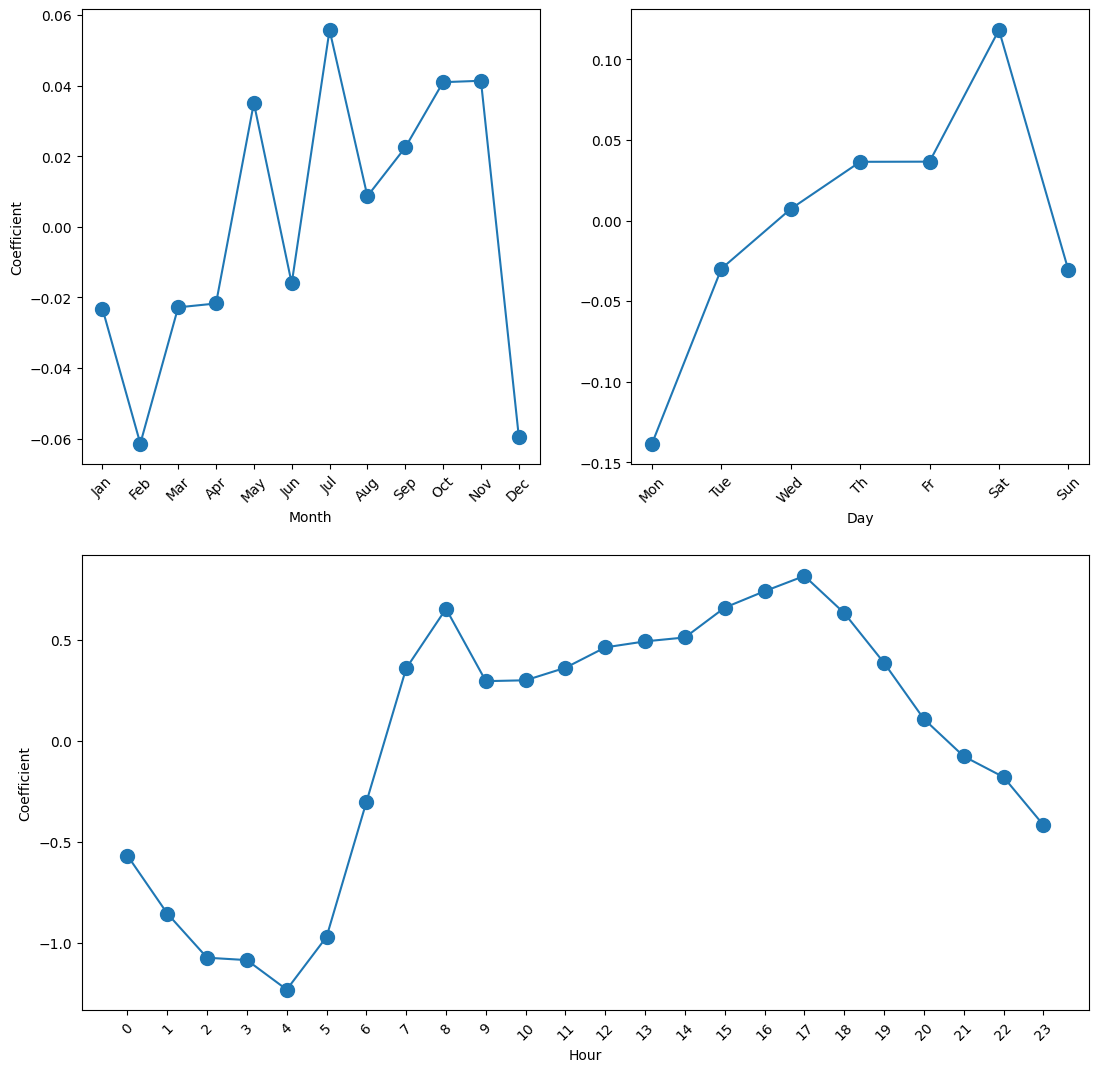

In [36]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(13,13))

x_month = np.arange(coef_month.shape[0])
ax_month = plt.subplot(gs[0, 0])
ax_month.plot(x_month, coef_month, marker='o', ms=10)
ax_month.set_xticks(x_month)
ax_month.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize
=10,rotation=45,)
ax_month.set_xlabel('Month', fontsize=10)
ax_month.set_ylabel('Coefficient', fontsize=10);

x_day = np.arange(coef_day.shape[0])
ax_day = plt.subplot(gs[0, 1])
ax_day.plot(x_day, coef_day, marker='o', ms=10)
ax_day.set_xticks(x_day)
ax_day.set_xticklabels(['Mon','Tue','Wed','Th','Fr','Sat','Sun'], fontsize
=10,rotation=45,)
ax_day.set_xlabel('Day', fontsize=10)

x_time = np.arange(coef_hr.shape[0])
ax_time = plt.subplot(gs[1, :])
ax_time.plot(x_time, coef_hr, marker='o', ms=10)
ax_time.set_xticks(x_time)
ax_time.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'], fontsize
=10,rotation=45,)
ax_time.set_xlabel('Hour', fontsize=10)
ax_time.set_ylabel('Coefficient', fontsize=10);

### 5.2 Plots: Weather and road type

Text(0.5, 0, 'Road')

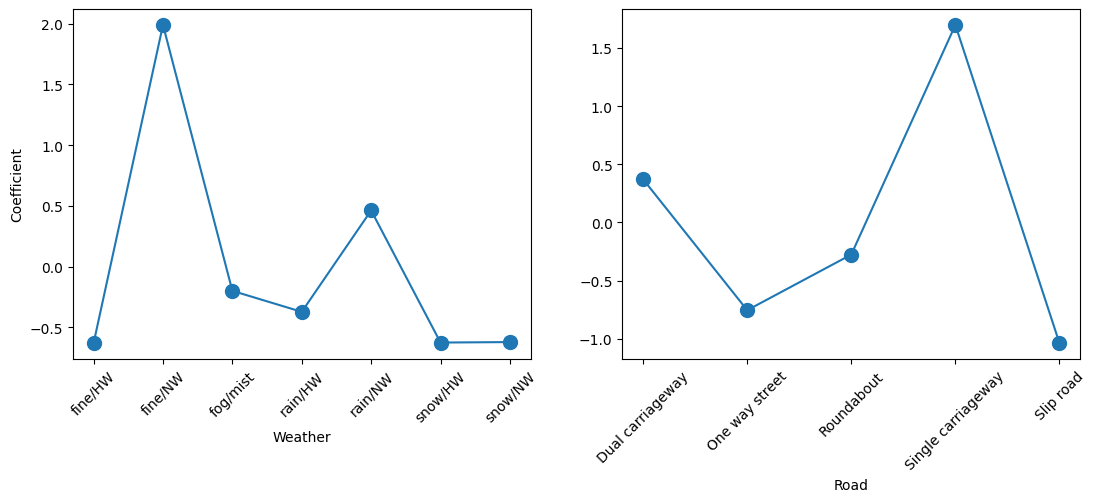

In [37]:
gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(13,10))


#fig_weather, ax_weather = subplots(figsize=(6,6))
x_weather = np.arange(coef_weath.shape[0])
ax_weather = plt.subplot(gs[0, 0])
ax_weather.plot(x_weather, coef_weath, marker='o', ms=10)
ax_weather.set_xticks(x_weather)
ax_weather.set_xticklabels(['fine/HW','fine/NW','fog/mist','rain/HW', 'rain/NW', 'snow/HW','snow/NW'], fontsize
=10,rotation=45,)
ax_weather.set_xlabel('Weather', fontsize=10)
ax_weather.set_ylabel('Coefficient', fontsize=10);

#fig_road, ax_road = subplots(figsize=(6,6))
x_road = np.arange(coef_road.shape[0])
ax_road = plt.subplot(gs[0, 1])
ax_road.plot(x_road, coef_road, marker='o', ms=10)
ax_road.set_xticks(x_road)
ax_road.set_xticklabels(['Dual carriageway','One way street','Roundabout','Single carriageway', 'Slip road'], fontsize
=10,rotation=45,)
ax_road.set_xlabel('Road', fontsize=10)

For the location, we only have to coefficients, with a positive coefficient for the urban environment and negative for the rural:

In [38]:
coef_urban

,0
Urban_or_Rural_Area[Rural],-0.2278
Urban_or_Rural['Urban'],0.2278


The magnitude of these coefficients is quite small, showing a positive association between accident frequency and urban areas, and a negative association with rural areas. Nevertheless, the localization does not seem to be an important factor and won't be analyzed in the next section.








# 6. Policy Recommendiations

### 6.1. Weekend spikes

Saturdays have the largest positive coefficient in the regression model. It seems related to people going out in the evening. Lets look at the distribution of accidents on Saturday by hour:

In [39]:
data = pd.DataFrame(UKAcc[UKAcc['Day_of_Week']==6].groupby('Hour',observed=False)['Count'].count())
data.index = data.index.astype(int)
print(f"Over all Saturdays, the hour with the largest number of accidents is {data.index[data['Count'] == data['Count'].max()][0]}:00 with the total of {data['Count'].max()} accidents.")

Over all Saturdays, the hour with the largest number of accidents is 17:00 with the total of 180 accidents.


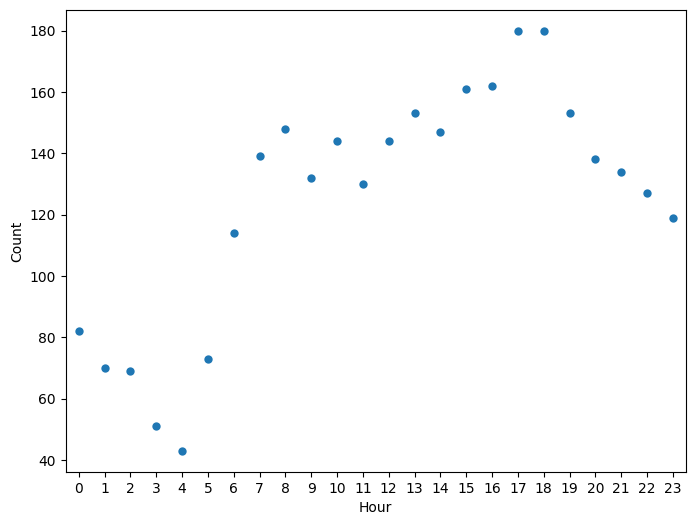

In [40]:
plt.figure(figsize=(8, 6))
sns.stripplot(x="Hour", y="Count", data=data, jitter=True, size=6)
#data=public, x="age", y="number", col="species", kind="strip",
#                  jitter=True, order=order,
plt.show()

The spike in accidents around 5 p.m. may be linked to people driving to pubs, social gatherings and entertainment venues.

**Recommendation**: Providing enough public transportation options in the late afternoon and early evening on the weekends.

### 6.2. Road Types

One type of road where the positive coefficient is dominant is a single carriageway. In contrast, a slip road has a negative coefficient with the second-largest magnitude. This makes sense: according to Wikipedia, "A single carriageway is a road with one, two, or more lanes arranged within one carriageway, with no central reservation or median strip to separate opposing traffic flows." A slip road, known in America as a highway ramp, is unlikely to be a high-collision area. Conversely, on a single carriageway without a median strip, collisions with oncoming traffic are far more likely.

**Recommendation**: While it may not be feasible to replace all single carriageways with dual carriageways, a potential solution could involve increasing police patrols to enforce speed limits and launching a public awareness campaign highlighting the dangers of careless driving.

### 6.3 Hourly spikes

The coefficient plot for hourly levels reveals two significant spikes around 8 a.m. and 5 p.m., which align clearly with rush hours.

**Recommendation**: Increase the frequency of public transportation options to reduce car dependency for commuting.

### 6.4. Month coefficients

There is a spike in accidents in both May and July, with similarly high numbers in October and November. The largest spike, in July, may be associated with increased vacation travel, though verifying this would require access to additional data sources. Thus at the moment, it's hard to give any recommendation.

### 6.5. Weather

Initially, it may seem surprising that good weather with no wind has the largest positive coefficient. However, on further reflection, this makes sense: if most days in the UK are calm and wind-free, then naturally, the majority of accidents would occur under these conditions.Let's check whether this is true:

In [41]:
print(f" The number of rows with fine/NW weather is {len(UKAcc[UKAcc['Weather_Conditions']=='fine/NW'])},which is {round(len(UKAcc[UKAcc['Weather_Conditions']=='fine/NW'])/len(UKAcc)*100,2)}% of all rows.")


 The number of rows with fine/NW weather is 12258,which is 61.1% of all rows.


Given the dominance of good weather over other types and the likelihood that people exercise more caution in adverse conditions, weather itself doesn't offer much additional insight into accident patterns.